# Student flow through Markov Chains

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Simulating Student Data

In [3]:
# Creates a Dataframe that allocates possible credits in a semester.
df = pd.DataFrame(np.random.choice([0,0,0,0,0,0,0,0,0,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],300_000).reshape(10_000,30))

This does not account for the summer semesters having a lower credit requirement and does not actually reflect student behavior.
- Fall, Spring Max = 18
- Summer Max = 12

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3,0,3,12,0,8,0,4,9,12,...,12,0,4,3,14,4,0,10,0,14
1,14,0,4,0,0,7,0,3,9,0,...,0,17,0,0,18,0,0,0,14,5
2,0,0,5,4,4,13,17,7,0,3,...,9,11,0,6,0,0,0,4,4,11
3,10,13,6,0,0,0,11,0,0,18,...,8,14,0,0,7,0,5,0,16,8
4,18,5,0,0,5,11,3,18,0,0,...,16,0,12,6,0,5,10,17,14,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14,0,11,4,13,18,0,16,0,7,...,0,14,0,14,4,18,0,15,13,10
9996,7,0,11,0,9,9,0,4,17,12,...,14,15,0,6,16,13,3,11,3,0
9997,0,0,18,0,8,7,0,16,0,0,...,10,14,12,0,18,17,0,0,9,15
9998,0,10,0,0,0,12,17,18,0,9,...,6,12,8,7,7,0,13,0,0,0


In [5]:
# Sums up the count of students credits over time
a = 0
for a in range(len(df)):
    z = 0
    nlist = []
    for x in df.loc[a]:
        z += x
        x = z
        nlist.append(x)
    df.loc[a] = nlist

In [6]:
# The average time a student takes to get to 120 credits(graduation)
df[18].mean()

122.4444

With current np choice results the average gradution is 6 years

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3,3,6,18,18,26,26,30,39,51,...,96,96,100,103,117,121,121,131,131,145
1,14,14,18,18,18,25,25,28,37,37,...,108,125,125,125,143,143,143,143,157,162
2,0,0,5,9,13,26,43,50,50,53,...,130,141,141,147,147,147,147,151,155,166
3,10,23,29,29,29,29,40,40,40,58,...,139,153,153,153,160,160,165,165,181,189
4,18,23,23,23,28,39,42,60,60,60,...,166,166,178,184,184,189,199,216,230,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14,14,25,29,42,60,60,76,76,83,...,173,187,187,201,205,223,223,238,251,261
9996,7,7,18,18,27,36,36,40,57,69,...,135,150,150,156,172,185,188,199,202,202
9997,0,0,18,18,26,33,33,49,49,49,...,120,134,146,146,164,181,181,181,190,205
9998,0,10,10,10,10,22,39,57,57,66,...,104,116,124,131,138,138,151,151,151,151


In [8]:
# Allocate student states
a = 0
ndf = df
for a in range(len(df)):
    z = 0
    nlist = []
    for x in df.loc[a]:
        if x >= 120:
            y = 'Graduated'
        elif x >= 105:
            y = 'Senior_n'
        elif x >= 90:
            y = 'Senior_1'
        elif x >= 75:
            y = 'Junior_n'
        elif x >= 60:
            y = 'Junior_1'
        elif x >= 45:
            y = 'Sophmore_n'
        elif x >= 30:
            y = 'Sophmore_1'
        elif x >= 15:
            y = 'Freshmen_n'
        else:
            y = 'Freshmen_1'
        nlist.append(y)
        
    ndf.loc[a] = nlist

In [9]:
ndf

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Freshmen_1,Freshmen_1,Freshmen_1,Freshmen_n,Freshmen_n,Freshmen_n,Freshmen_n,Sophmore_1,Sophmore_1,Sophmore_n,...,Senior_1,Senior_1,Senior_1,Senior_1,Senior_n,Graduated,Graduated,Graduated,Graduated,Graduated
1,Freshmen_1,Freshmen_1,Freshmen_n,Freshmen_n,Freshmen_n,Freshmen_n,Freshmen_n,Freshmen_n,Sophmore_1,Sophmore_1,...,Senior_n,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated
2,Freshmen_1,Freshmen_1,Freshmen_1,Freshmen_1,Freshmen_1,Freshmen_n,Sophmore_1,Sophmore_n,Sophmore_n,Sophmore_n,...,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated
3,Freshmen_1,Freshmen_n,Freshmen_n,Freshmen_n,Freshmen_n,Freshmen_n,Sophmore_1,Sophmore_1,Sophmore_1,Sophmore_n,...,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated
4,Freshmen_n,Freshmen_n,Freshmen_n,Freshmen_n,Freshmen_n,Sophmore_1,Sophmore_1,Junior_1,Junior_1,Junior_1,...,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Freshmen_1,Freshmen_1,Freshmen_n,Freshmen_n,Sophmore_1,Junior_1,Junior_1,Junior_n,Junior_n,Junior_n,...,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated
9996,Freshmen_1,Freshmen_1,Freshmen_n,Freshmen_n,Freshmen_n,Sophmore_1,Sophmore_1,Sophmore_1,Sophmore_n,Junior_1,...,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated
9997,Freshmen_1,Freshmen_1,Freshmen_n,Freshmen_n,Freshmen_n,Sophmore_1,Sophmore_1,Sophmore_n,Sophmore_n,Sophmore_n,...,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated
9998,Freshmen_1,Freshmen_1,Freshmen_1,Freshmen_1,Freshmen_1,Freshmen_n,Sophmore_1,Sophmore_n,Sophmore_n,Junior_1,...,Senior_1,Senior_n,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated


## Student Counts by Semester

In [15]:
ndf[0].value_counts(normalize=True), ndf[0].value_counts()

(Freshmen_1    0.8525
 Freshmen_n    0.1475
 Name: 0, dtype: float64,
 Freshmen_1    8525
 Freshmen_n    1475
 Name: 0, dtype: int64)

In [11]:
States = ['Graduated','Senior_n','Senior_1','Junior_n','Junior_1','Sophmore_n','Sophmore_1','Freshmen_n','Freshmen_1']

In [12]:
Counts = [0,0,0,0,0,0,0,0,0]

In [13]:
counts = pd.DataFrame(States,columns=['States'])
counts

,States
0,Graduated
1,Senior_n
2,Senior_1
3,Junior_n
4,Junior_1
5,Sophmore_n
6,Sophmore_1
7,Freshmen_n
8,Freshmen_1


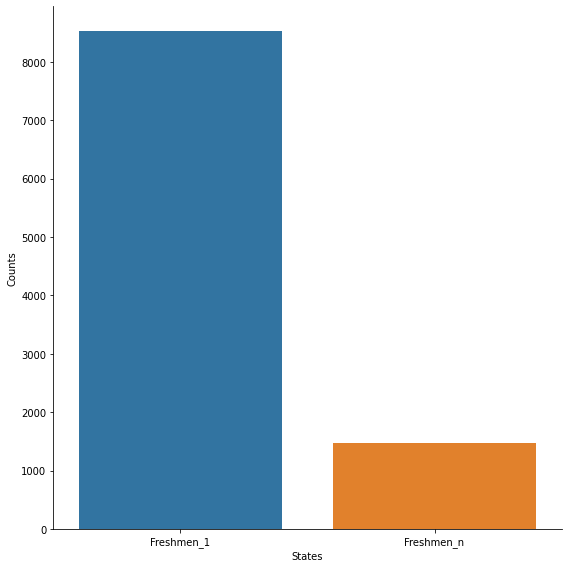

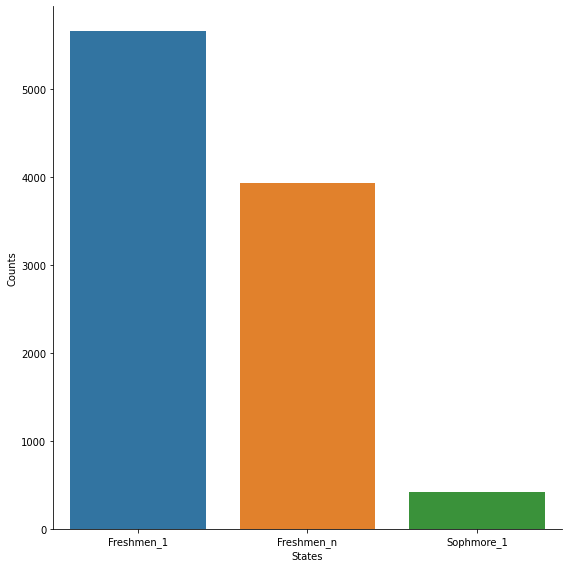

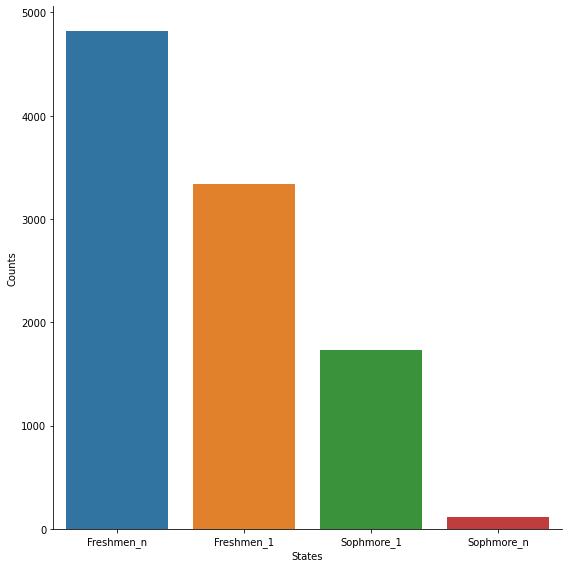

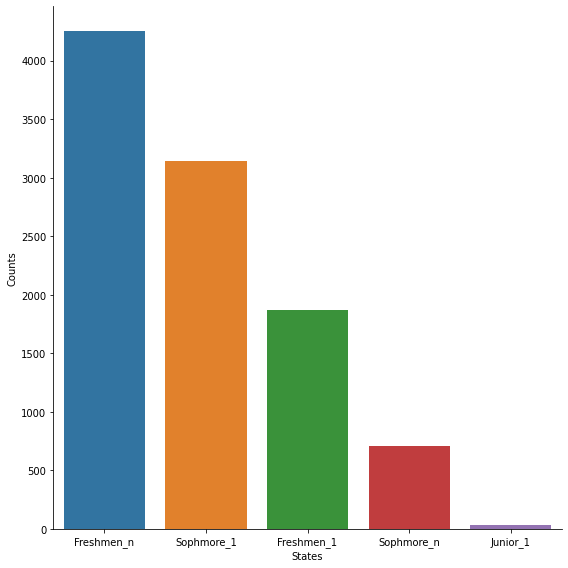

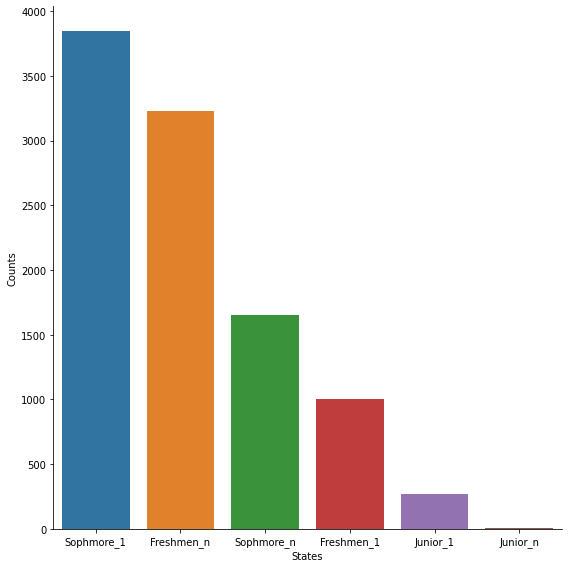

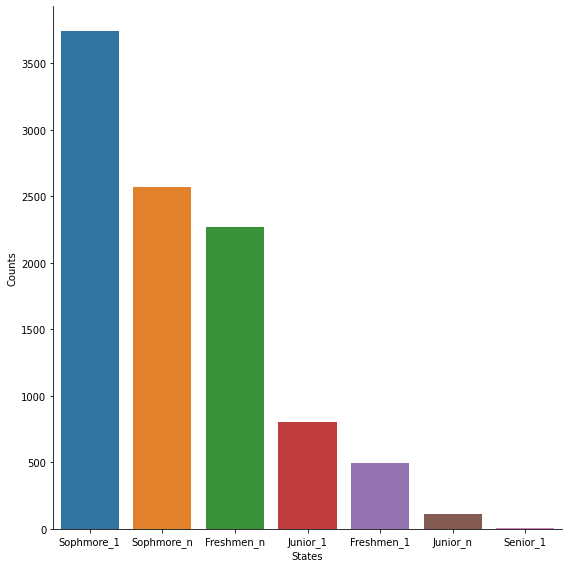

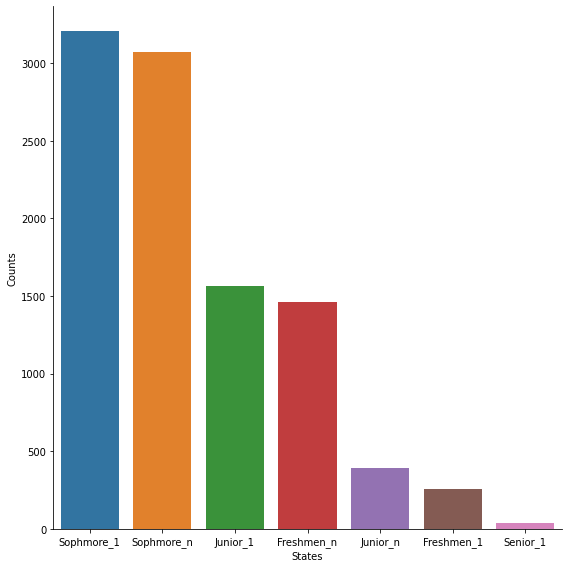

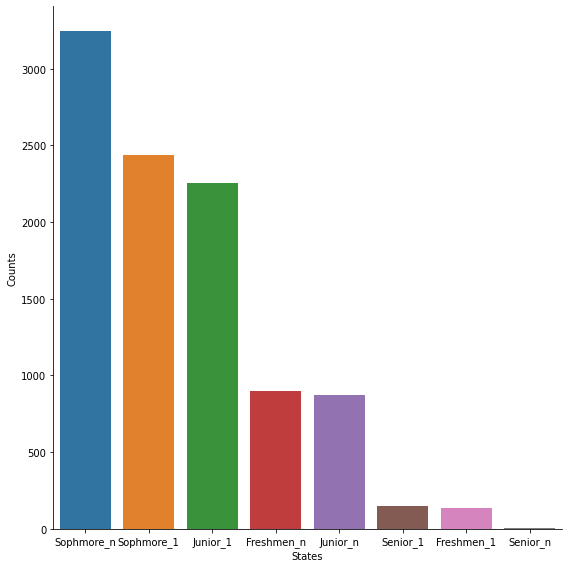

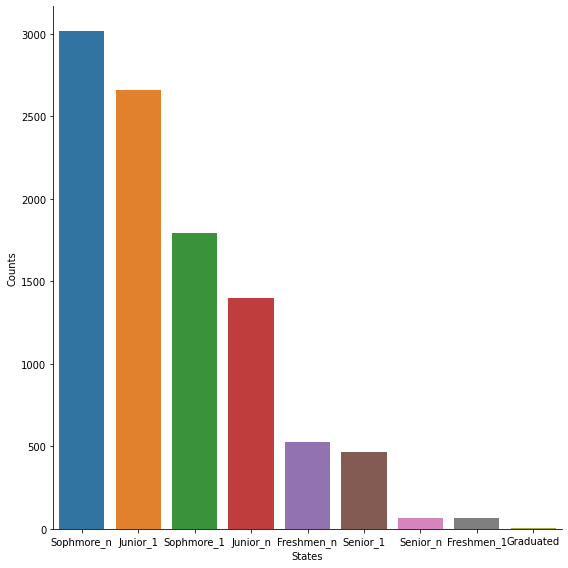

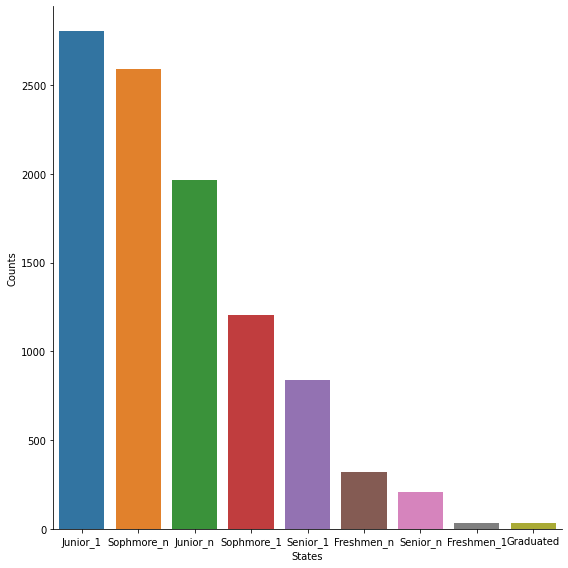

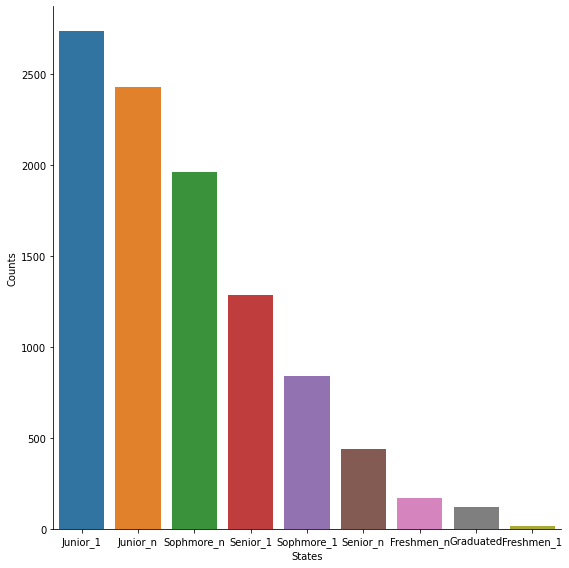

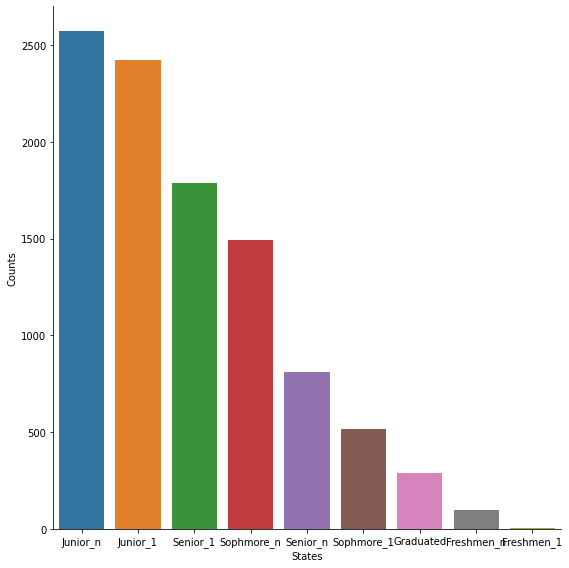

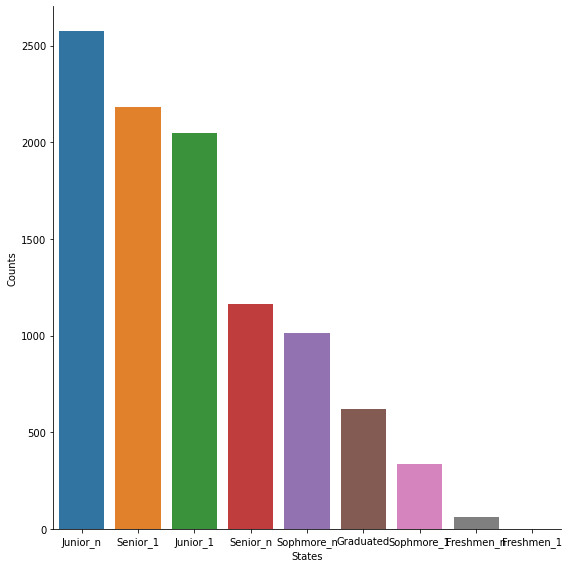

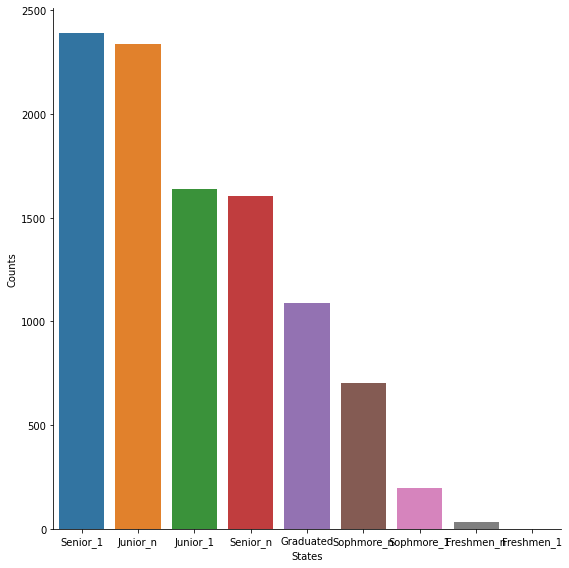

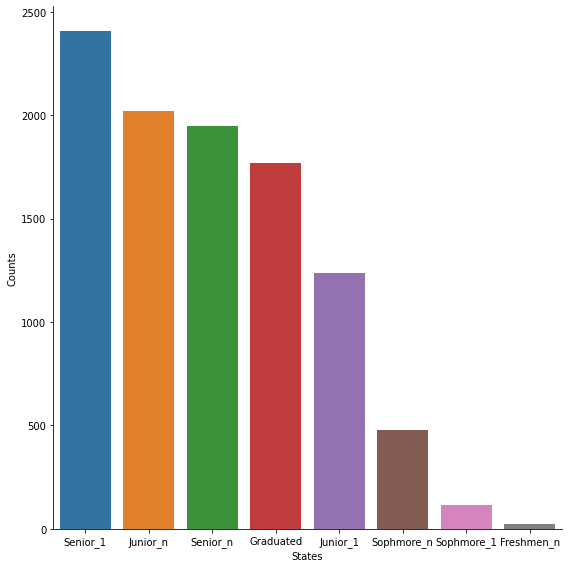

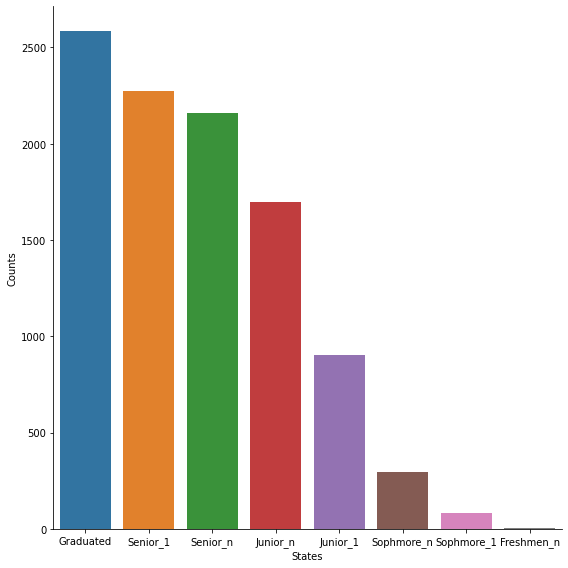

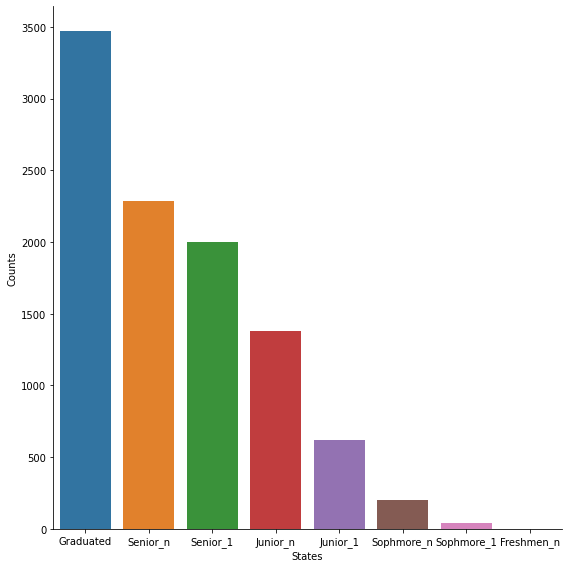

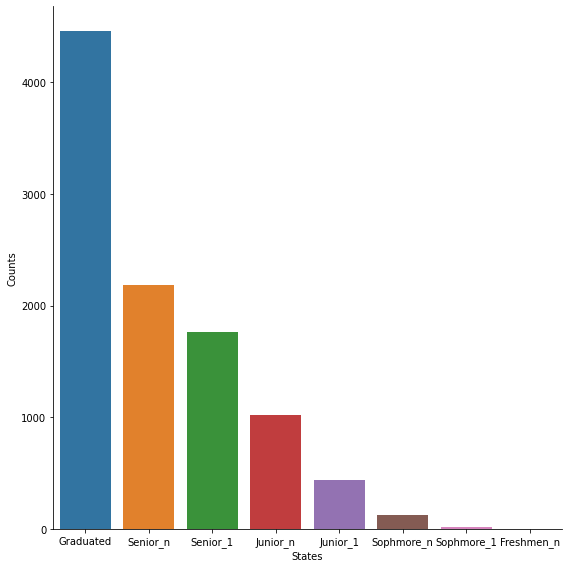

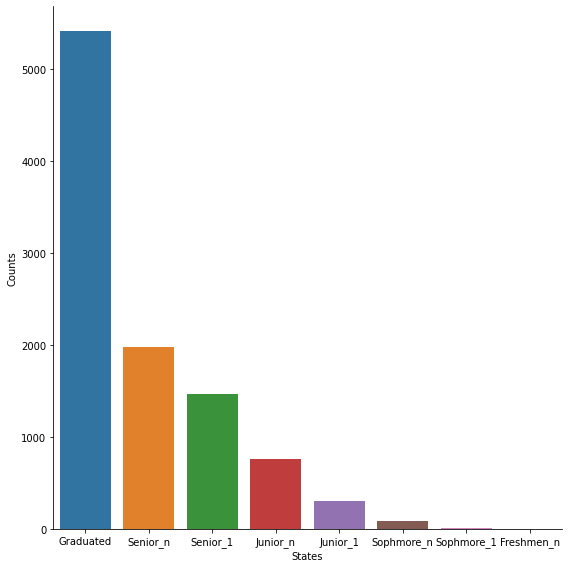

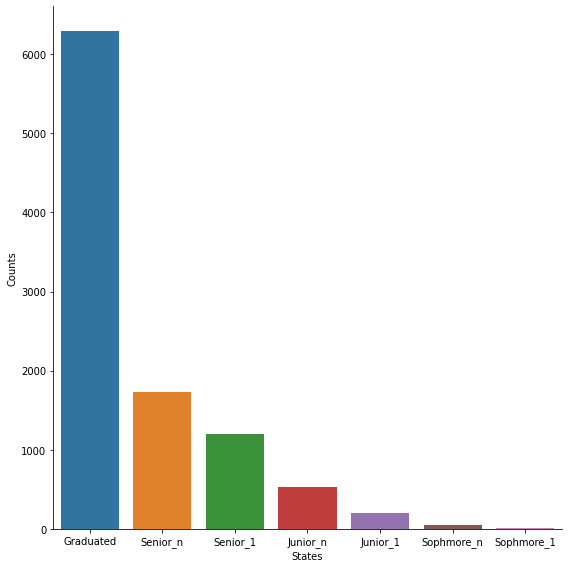

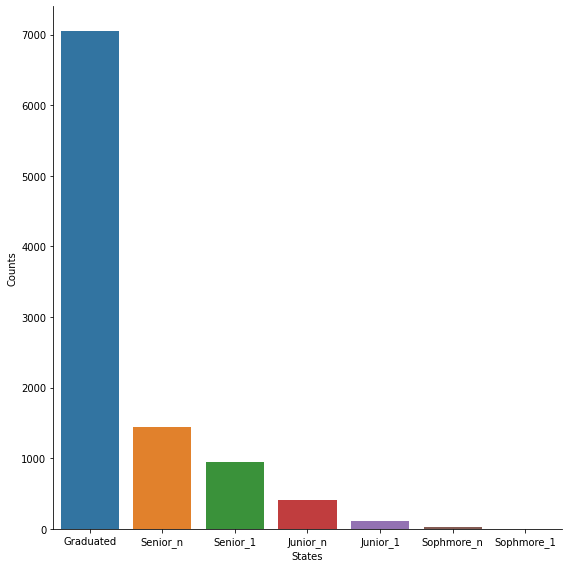

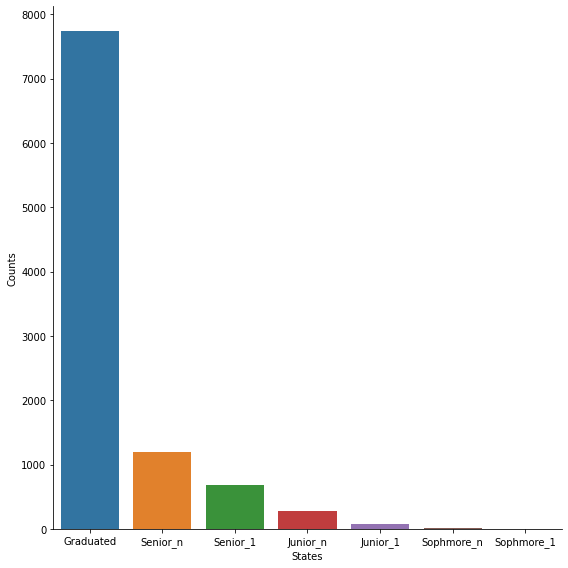

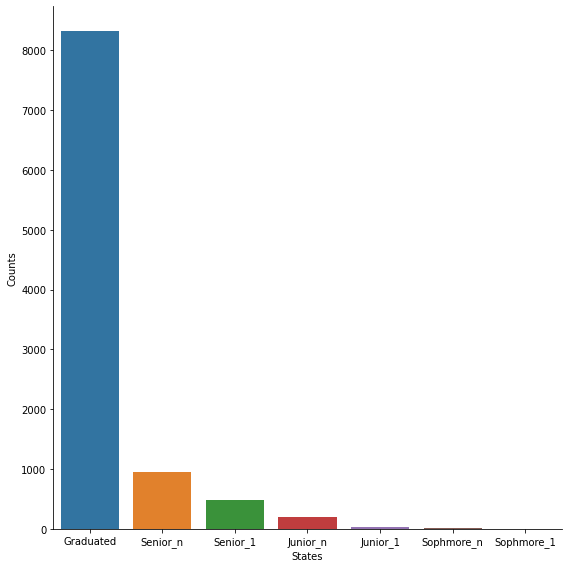

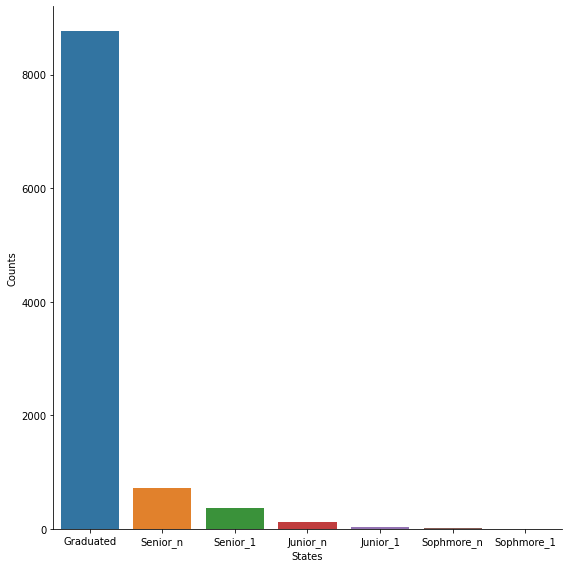

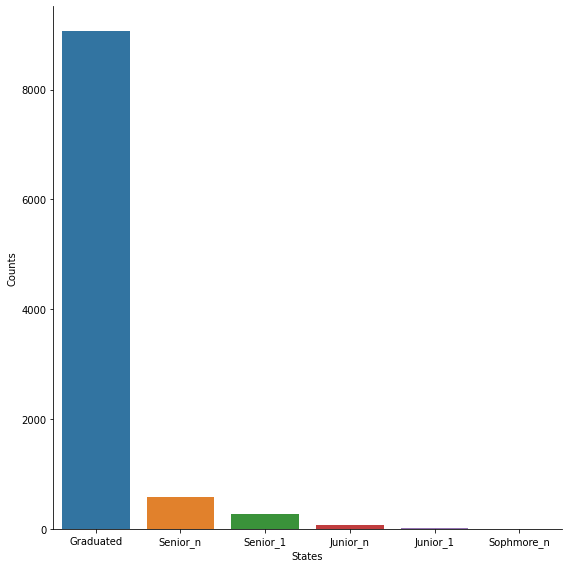

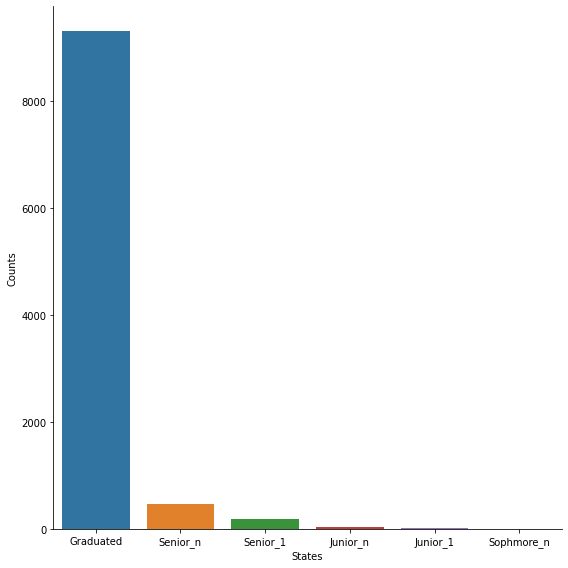

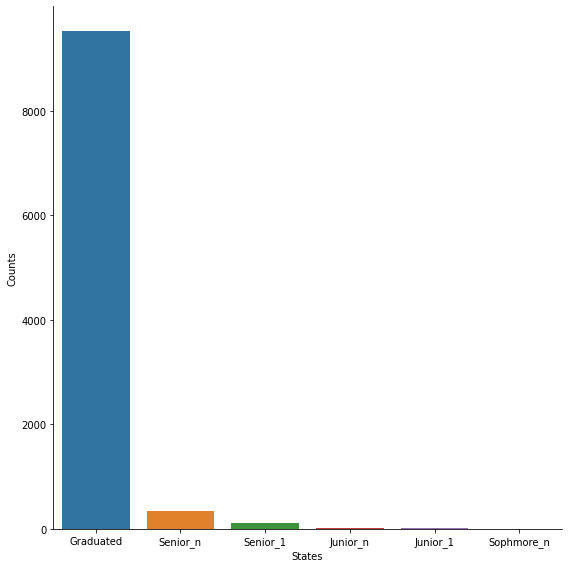

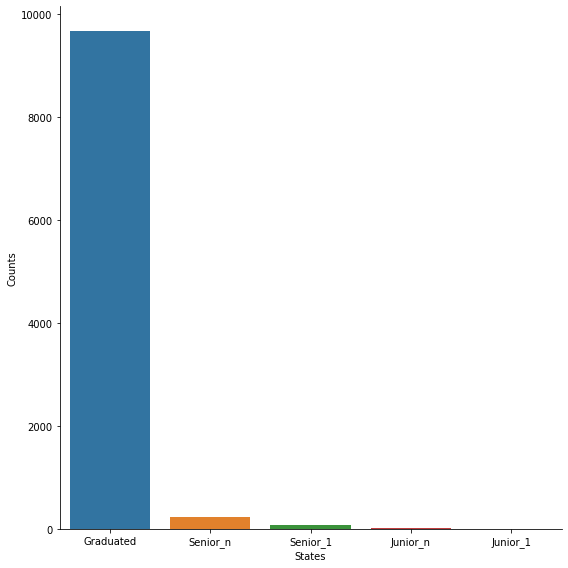

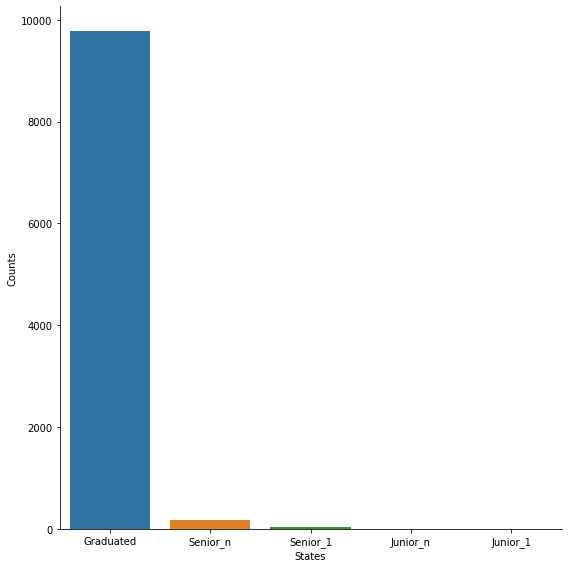

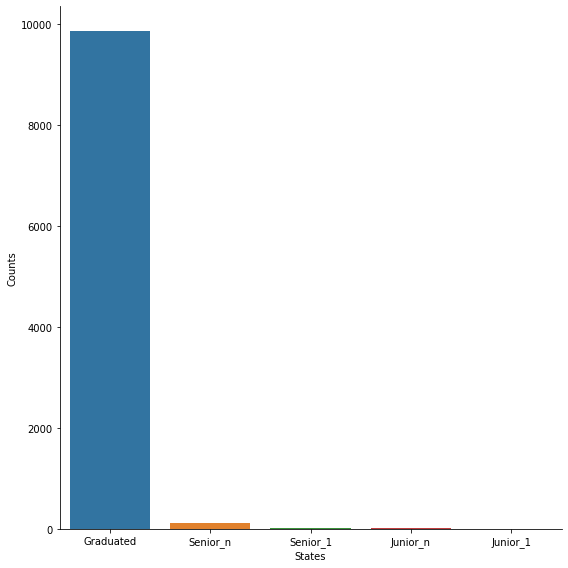

In [55]:
for x in range(30):
    sns.catplot(x = 'States', y = 'Counts', data = ndf[x].value_counts().reset_index().rename(columns={'index':'States',x:'Counts'}),height=8,kind='bar')
    plt.show()

In [25]:
ndf[0].value_counts()

Freshmen_1    8525
Freshmen_n    1475
Name: 0, dtype: int64

In [26]:
ndf[1].value_counts()

Freshmen_1    5653
Freshmen_n    3931
Sophmore_1     416
Name: 1, dtype: int64

In [27]:
ndf[2].value_counts()

Freshmen_n    4818
Freshmen_1    3337
Sophmore_1    1731
Sophmore_n     114
Name: 2, dtype: int64

In [28]:
ndf[3].value_counts()

Freshmen_n    4251
Sophmore_1    3142
Freshmen_1    1870
Sophmore_n     707
Junior_1        30
Name: 3, dtype: int64

In [29]:
ndf[4].value_counts()

Sophmore_1    3844
Freshmen_n    3228
Sophmore_n    1650
Freshmen_1    1003
Junior_1       267
Junior_n         8
Name: 4, dtype: int64

In [30]:
ndf[5].value_counts()

Sophmore_1    3741
Sophmore_n    2573
Freshmen_n    2272
Junior_1       805
Freshmen_1     496
Junior_n       109
Senior_1         4
Name: 5, dtype: int64

In [31]:
ndf[6].value_counts()

Sophmore_1    3206
Sophmore_n    3074
Junior_1      1568
Freshmen_n    1465
Junior_n       395
Freshmen_1     257
Senior_1        35
Name: 6, dtype: int64

In [32]:
ndf[7].value_counts()

Sophmore_n    3244
Sophmore_1    2440
Junior_1      2252
Freshmen_n     896
Junior_n       876
Senior_1       146
Freshmen_1     137
Senior_n         9
Name: 7, dtype: int64

In [33]:
ndf[8].value_counts()

Sophmore_n    3016
Junior_1      2661
Sophmore_1    1794
Junior_n      1398
Freshmen_n     528
Senior_1       468
Senior_n        68
Freshmen_1      63
Graduated        4
Name: 8, dtype: int64

In [34]:
ndf[9].value_counts()

Junior_1      2803
Sophmore_n    2589
Junior_n      1968
Sophmore_1    1204
Senior_1       837
Freshmen_n     321
Senior_n       210
Freshmen_1      35
Graduated       33
Name: 9, dtype: int64

In [35]:
ndf[10].value_counts()

Junior_1      2736
Junior_n      2429
Sophmore_n    1961
Senior_1      1286
Sophmore_1     840
Senior_n       441
Freshmen_n     170
Graduated      119
Freshmen_1      18
Name: 10, dtype: int64

In [36]:
ndf[11].value_counts()

Junior_n      2572
Junior_1      2426
Senior_1      1787
Sophmore_n    1494
Senior_n       810
Sophmore_1     515
Graduated      290
Freshmen_n      99
Freshmen_1       7
Name: 11, dtype: int64

In [37]:
ndf[12].value_counts()

Junior_n      2574
Senior_1      2183
Junior_1      2048
Senior_n      1162
Sophmore_n    1013
Graduated      622
Sophmore_1     337
Freshmen_n      59
Freshmen_1       2
Name: 12, dtype: int64

In [38]:
ndf[13].value_counts()

Senior_1      2391
Junior_n      2339
Junior_1      1638
Senior_n      1604
Graduated     1090
Sophmore_n     703
Sophmore_1     199
Freshmen_n      35
Freshmen_1       1
Name: 13, dtype: int64

In [39]:
ndf[14].value_counts()

Senior_1      2406
Junior_n      2022
Senior_n      1949
Graduated     1768
Junior_1      1236
Sophmore_n     479
Sophmore_1     117
Freshmen_n      23
Name: 14, dtype: int64

In [40]:
ndf[15].value_counts()

Graduated     2584
Senior_1      2275
Senior_n      2158
Junior_n      1696
Junior_1       902
Sophmore_n     298
Sophmore_1      80
Freshmen_n       7
Name: 15, dtype: int64

In [41]:
ndf[16].value_counts()

Graduated     3470
Senior_n      2288
Senior_1      1998
Junior_n      1378
Junior_1       622
Sophmore_n     203
Sophmore_1      39
Freshmen_n       2
Name: 16, dtype: int64

In [42]:
ndf[17].value_counts()

Graduated     4458
Senior_n      2181
Senior_1      1763
Junior_n      1020
Junior_1       434
Sophmore_n     121
Sophmore_1      21
Freshmen_n       2
Name: 17, dtype: int64

In [43]:
ndf[18].value_counts()

Graduated     5407
Senior_n      1977
Senior_1      1467
Junior_n       755
Junior_1       300
Sophmore_n      84
Sophmore_1       9
Freshmen_n       1
Name: 18, dtype: int64

In [44]:
ndf[19].value_counts()

Graduated     6291
Senior_n      1725
Senior_1      1201
Junior_n       525
Junior_1       198
Sophmore_n      53
Sophmore_1       7
Name: 19, dtype: int64

In [45]:
ndf[20].value_counts()

Graduated     7048
Senior_n      1450
Senior_1       941
Junior_n       409
Junior_1       117
Sophmore_n      32
Sophmore_1       3
Name: 20, dtype: int64

In [46]:
ndf[21].value_counts()

Graduated     7736
Senior_n      1201
Senior_1       688
Junior_n       283
Junior_1        70
Sophmore_n      20
Sophmore_1       2
Name: 21, dtype: int64

In [47]:
ndf[22].value_counts()

Graduated     8320
Senior_n       946
Senior_1       484
Junior_n       196
Junior_1        39
Sophmore_n      13
Sophmore_1       2
Name: 22, dtype: int64

In [48]:
ndf[23].value_counts()

Graduated     8763
Senior_n       724
Senior_1       361
Junior_n       116
Junior_1        27
Sophmore_n       7
Sophmore_1       2
Name: 23, dtype: int64

In [49]:
ndf[24].value_counts()

Graduated     9064
Senior_n       579
Senior_1       264
Junior_n        70
Junior_1        18
Sophmore_n       5
Name: 24, dtype: int64

In [50]:
ndf[25].value_counts()

Graduated     9306
Senior_n       458
Senior_1       181
Junior_n        38
Junior_1        15
Sophmore_n       2
Name: 25, dtype: int64

In [51]:
ndf[26].value_counts()

Graduated     9523
Senior_n       335
Senior_1       112
Junior_n        18
Junior_1        10
Sophmore_n       2
Name: 26, dtype: int64

In [52]:
ndf[27].value_counts()

Graduated    9671
Senior_n      240
Senior_1       70
Junior_n       12
Junior_1        7
Name: 27, dtype: int64

In [53]:
ndf[28].value_counts()

Graduated    9774
Senior_n      170
Senior_1       45
Junior_n        7
Junior_1        4
Name: 28, dtype: int64

In [54]:
ndf[29].value_counts()

Graduated    9856
Senior_n      107
Senior_1       27
Junior_n        8
Junior_1        2
Name: 29, dtype: int64

## Probability of changing states